In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


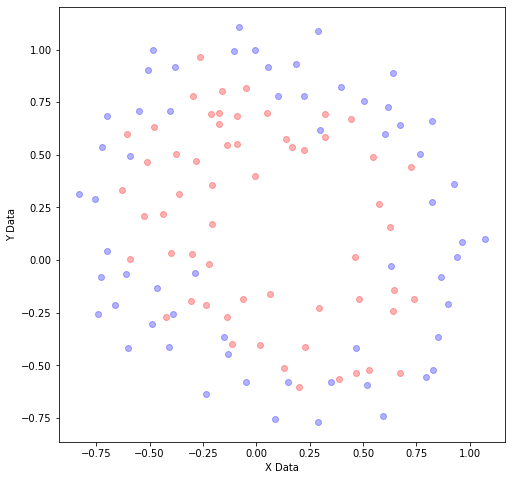

In [0]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import style
import csv
import math

data    = np.genfromtxt("/content/drive/My Drive/data-nonlinear.txt", delimiter=',')

x_data       = data[:, 0]
y_data       = data[:, 1]
label        = data[:, 2]

x_label0    = x_data[label == 0]
x_label1    = x_data[label == 1]

y_label0    = y_data[label == 0]
y_label1    = y_data[label == 1]

plt.figure(figsize=(8, 8))
plt.xlabel('X Data')
plt.ylabel('Y Data')
plt.scatter(x_label0, y_label0, alpha=0.3, c='b')
plt.scatter(x_label1, y_label1, alpha=0.3, c='r')
plt.show()

In [0]:
theta = []
new_theta = []
ramda = 100
gradient_theta = []
for i in range(100):
  theta.append(1)
  new_theta.append(0)
  gradient_theta.append(0)

m = float(len(x_data))
learning_rate = float(0.001)

J0 = []
for i in range(len(x_data)):
  J0.append(0)


In [0]:
#-------------------------------------------------------------------------------

for i in range(len(x_data)):
  x = x_data[i]
  y = y_data[i]
  for j in range(10):
    for k in range(10):
      J0[i] += theta[10*j + k] * (x ** j) * (y ** k)

for i in range(len(x_data)):
  J0[i] = 1 / (1 + np.exp( -1 * (J0[i])))

theta_space0 = []
theta_space1 = []
for i in range(10000):
  theta_space0.append(0)

for i in range(100):
  theta_space1.append(theta_space0)

#print(theta_space1[99][9999])

In [0]:
#-------------------------------------------------------------------------------


for i in range(10000):
  for j in range(len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]

    for k in range(len(gradient_theta)):
      gradient_theta[k] += ( (J0[j] - l) * (x ** (k//10)) * ( y ** (k%10) )) / m
    
  for j in range(len(theta)):
    new_theta[j] =  ( ( 1 - (learning_rate * ramda) ) * theta[j] ) - (learning_rate * gradient_theta[j])

  for j in range(len(theta)):
    gradient_theta[j] = float(0)
    theta[j] = new_theta[j]
    theta_space1[j][i] = theta[j]

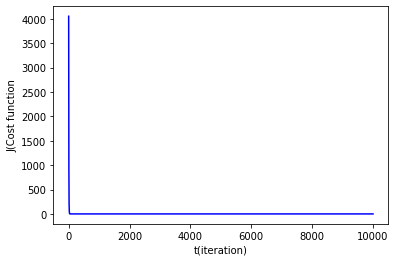

last value =  2.5599432687552017


In [0]:
mul_theta = []
for i in range(10000):
  mul_theta.append(0)

for i in range(10000):
  for j in range(100):
    mul_theta[i] += (theta_space1[j][i] ** 2)

J1 = []
for i in range (10000):
  J1.append(0)

for i in range (10000):
  for j in range (len(x_data)):
    x = x_data[j]
    y = y_data[j]
    l = label[j]

    J1[i] += (-1 * l * np.log( J0[j] ) - ( ( 1 - l ) * ( np.log( 1 - J0[j] ) ) ) ) / m
  
  J1[i] += (ramda / 2) * mul_theta[i]

x = range(10000)
plt.xlabel('t(iteration)')
plt.ylabel('J(Cost function')
plt.plot(x, J1, 'blue')
plt.show()

print('last value = ', J1[9999])